Predecir el coste del seguro médico de una persona

In [18]:
import pandas as pd
df= pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
categoricas = ['sex','smoker','region']
numericas =['age', 'bmi','children']
y='charges'

In [21]:
df = df[categoricas + numericas + [y]]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
x, y =df.drop(columns='charges'), df[y]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
df.isnull().sum().sort_values(ascending=False)

sex         0
smoker      0
region      0
age         0
bmi         0
children    0
charges     0
dtype: int64

/tmp/ipykernel_4530/3319090890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data = df, palette= "Set2")
/tmp/ipykernel_4530/3319090890.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data = df, palette= "Set2")
/tmp/ipykernel_4530/3319090890.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data = df, palette= "Set2")


([0, 1, 2, 3],
 [Text(0, 0, 'southwest'),
  Text(1, 0, 'southeast'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast')])

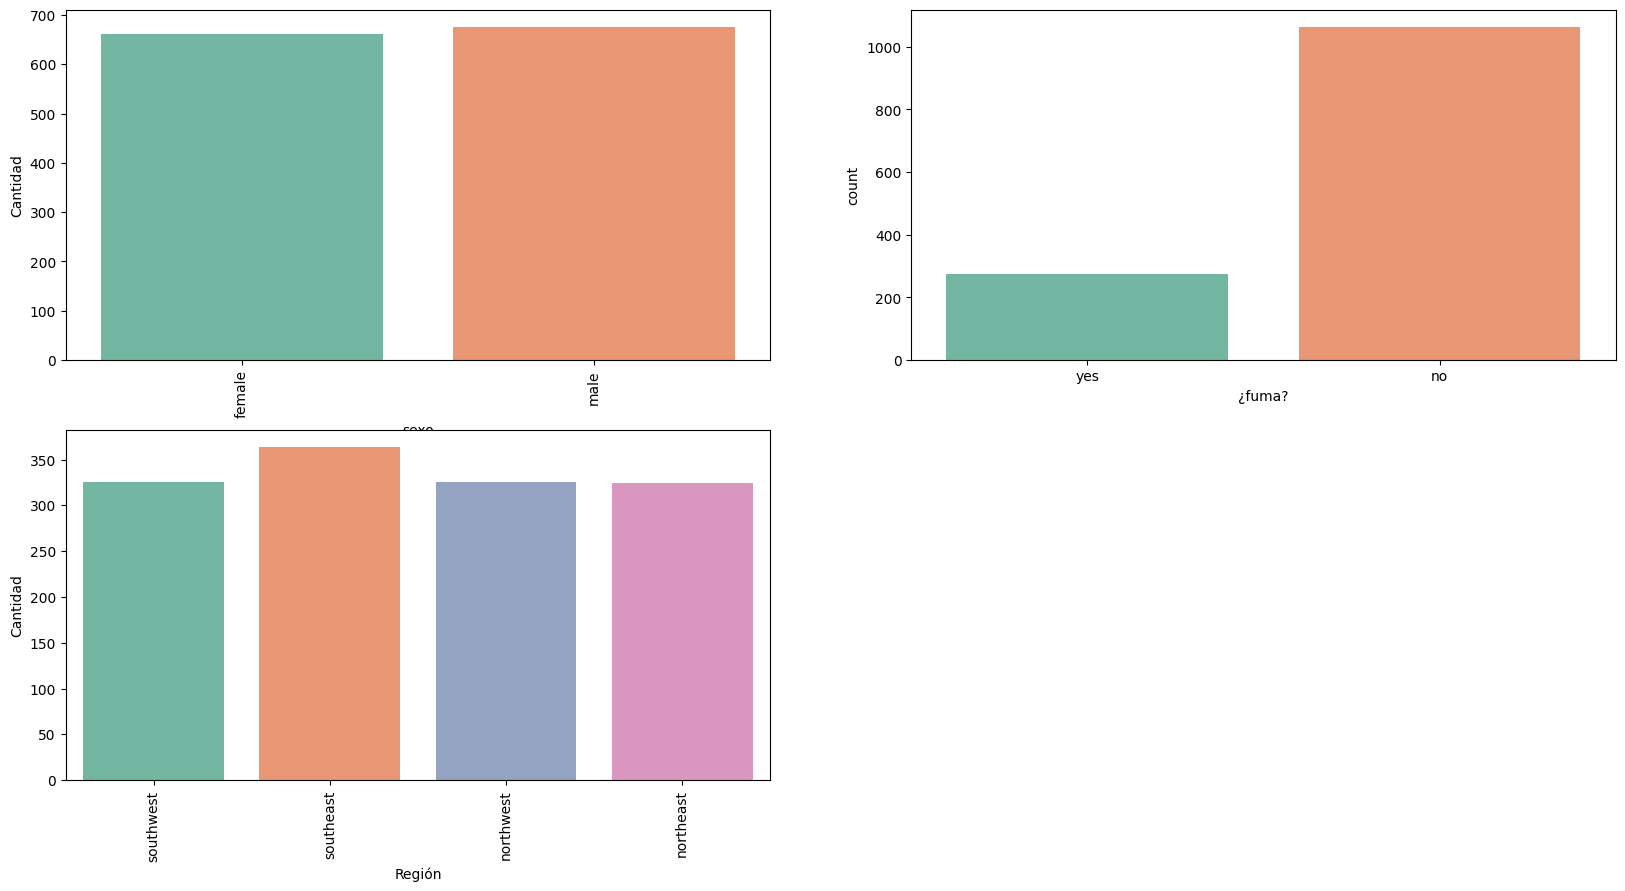

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
#CATEGORICAS
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x='sex', data = df, palette= "Set2")
plt.xlabel("sexo")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(x='smoker', data = df, palette= "Set2")
plt.xlabel("¿fuma?")

plt.subplot(2,2,3)
sns.countplot(x='region', data = df, palette= "Set2")
plt.xlabel("Región")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)



In [28]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [29]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [30]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/tmp/ipykernel_4530/4233046623.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']);
/tmp/ipykernel_4530/4233046623.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['children']);
/tmp/ipykernel_4530/4233046623.py:17: UserWarning: 

`distplot` is a deprecated function and will be

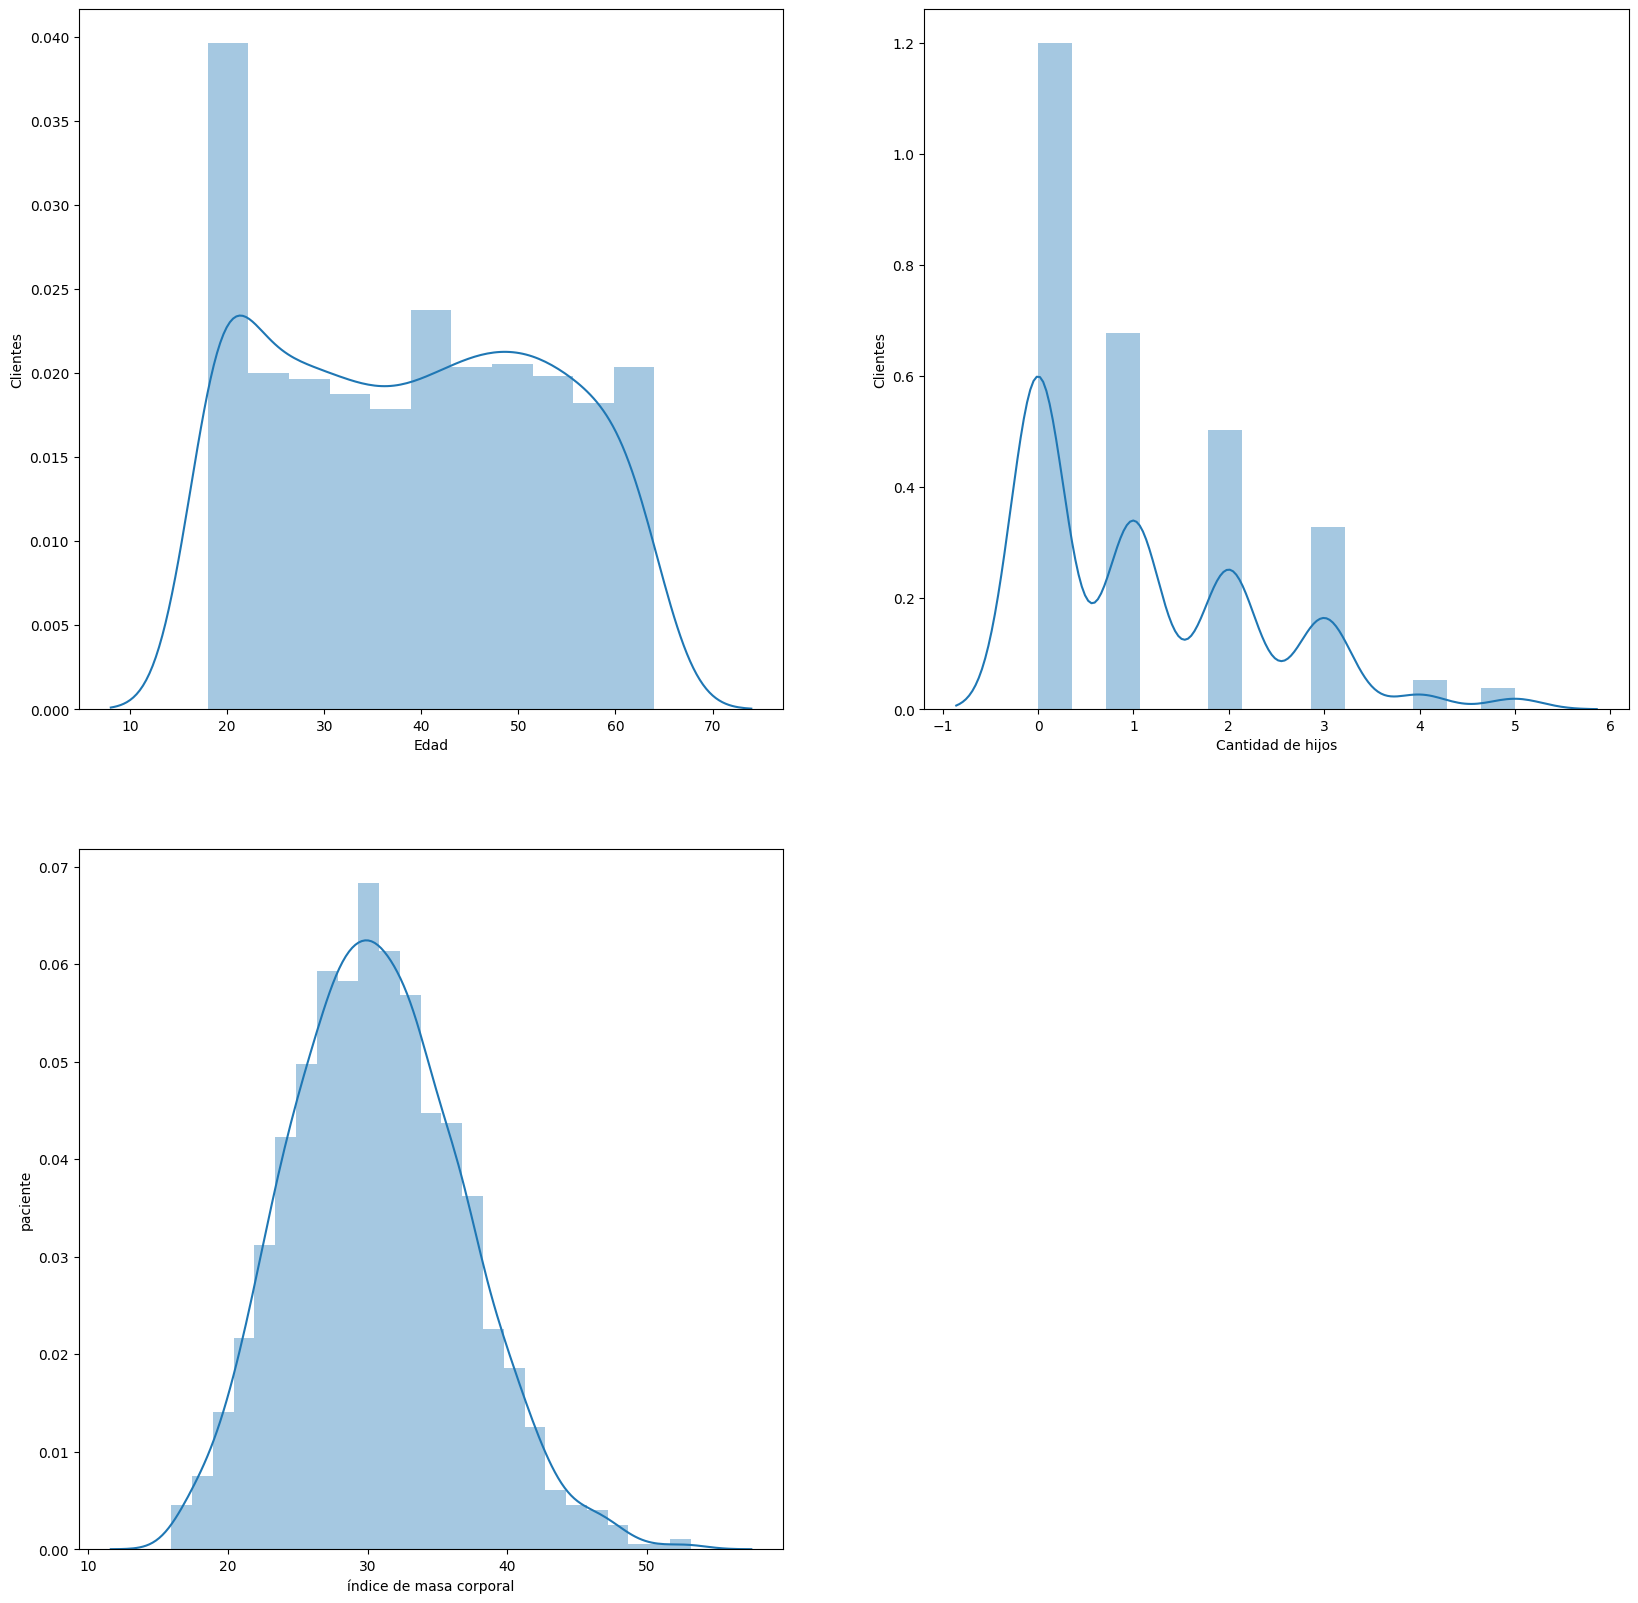

In [31]:
#NUMERICAS

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.distplot(df['age']);
plt.xlabel("Edad")
plt.ylabel("Clientes")


plt.subplot(2,2,2)
sns.distplot(df['children']);
plt.xlabel("Cantidad de hijos")
plt.ylabel("Clientes")


plt.subplot(2,2,3)
sns.distplot(df['bmi']);
plt.xlabel("índice de masa corporal")
plt.ylabel("paciente")

plt.show()



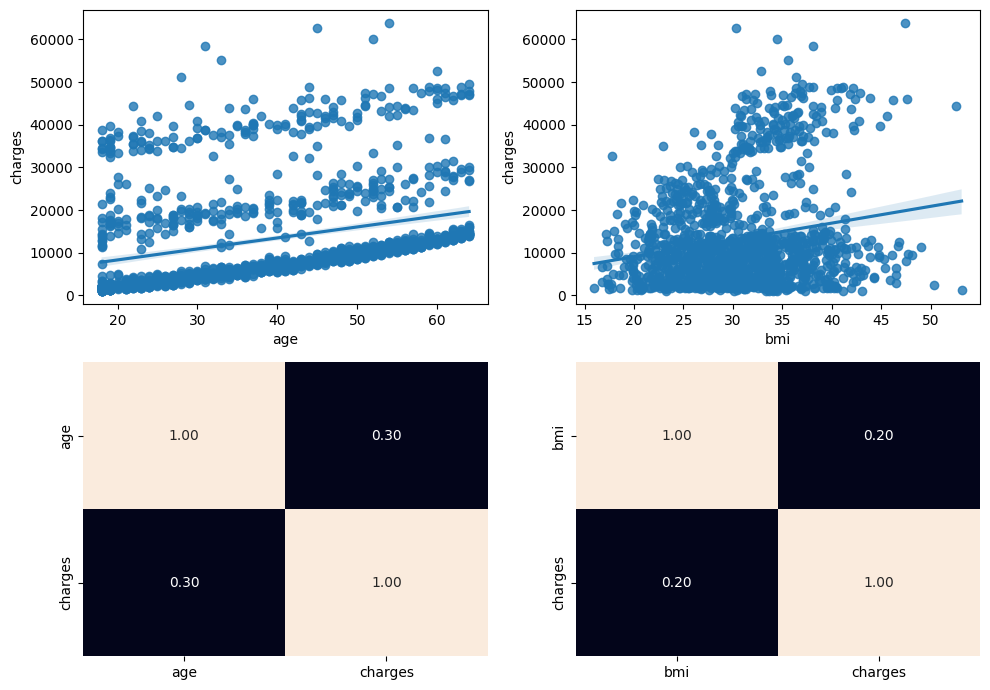

In [32]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

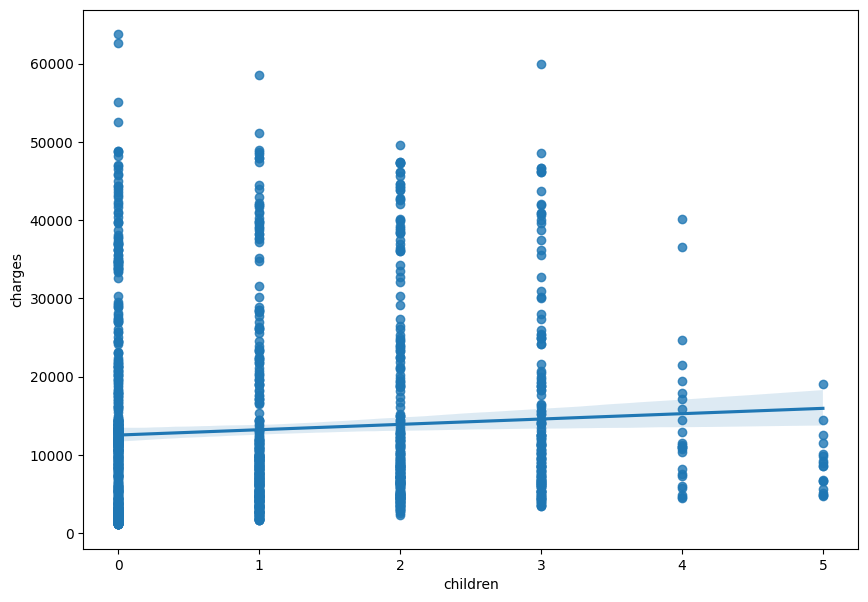

In [33]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.regplot(data = df, x = "children", y = "charges")

plt.show()

<Axes: >

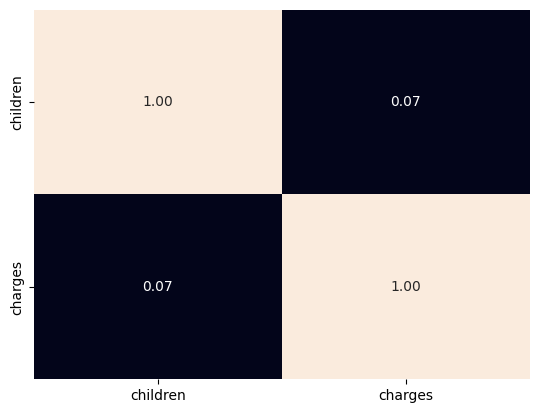

In [34]:
sns.heatmap(df[["children", "charges"]].corr(), annot = True, fmt = ".2f", cbar = False)


FUNCION TRAMPITA

In [35]:
def scaler(X_train_, X_test_, nums):
  X_train = X_train_.copy()
  X_test = X_test_.copy()
  scaler = StandardScaler()
  # Train
  X_train_scaled = pd.DataFrame(
             scaler.fit_transform(X_train[nums]),
             columns=scaler.get_feature_names_out(),
             index = X_train.index)
  X_train_scaled = X_train_scaled.join(X_train[list(set(X_train.columns)  - set(nums))])
  # Test
  X_test_scaled = pd.DataFrame(
      scaler.transform(X_test[nums]),
      columns = scaler.get_feature_names_out(),
      index = X_test.index)
  X_test_scaled = X_test_scaled.join(X_test[list(set(X_test.columns)  - set(nums))])
  X_test_scaled = X_test_scaled[X_train_scaled.columns]
  return X_train_scaled, X_test_scaled


def to_binary(X_train_, X_test_, cats):
  X_train =  X_train_.copy()
  X_test = X_test_.copy()
  ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
  # train
  X_train_bin = pd.DataFrame(ohe.fit_transform(
      X_train[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_train.index)
  X_train_bin = X_train_bin.join(X_train[list(set(X_train.columns)  - set(cats))])
  # test
  X_test_bin = pd.DataFrame(ohe.transform(X_test[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_test.index)
  X_test_bin = X_test_bin.join(X_test[list(set(X_test.columns)  - set(cats))])
  X_test_bin = X_test_bin[X_train_bin.columns]
  return X_train_bin, X_test_bin

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

In [37]:
x_train_ml , x_test_ml = scaler(x_train, x_test, numericas)

In [38]:
x_train_ml, x_test_ml = to_binary(x_train_ml, x_test_ml, categoricas)

In [39]:
x_train_ml.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi,age,children
615,0.0,1.0,0.0,1.0,0.0,0.983718,0.541538,-0.083033
460,0.0,0.0,0.0,1.0,0.0,0.983718,0.684048,1.562256
1324,1.0,0.0,1.0,0.0,0.0,-0.763466,-0.598542,-0.083033
829,1.0,0.0,1.0,0.0,0.0,-1.430811,-0.028502,-0.083033
824,1.0,0.0,1.0,0.0,0.0,-1.027300,1.467854,-0.905678


In [40]:
x_test_ml.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi,age,children
1017,0.0,0.0,0.0,0.0,1.0,0.586742,-0.954817,0.739611
644,1.0,0.0,0.0,1.0,0.0,0.768077,0.256518,0.739611
711,0.0,0.0,0.0,1.0,0.0,-1.154725,0.755303,0.739611
30,1.0,1.0,0.0,0.0,1.0,0.815453,-1.239837,-0.905678
1327,1.0,0.0,0.0,1.0,0.0,-0.094488,0.826558,-0.083033


In [41]:
x_data=pd.concat([x_train_ml,x_test_ml])

In [46]:
x_data.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi,age,children
615,0.0,1.0,0.0,1.0,0.0,0.983718,0.541538,-0.083033
460,0.0,0.0,0.0,1.0,0.0,0.983718,0.684048,1.562256
1324,1.0,0.0,1.0,0.0,0.0,-0.763466,-0.598542,-0.083033
829,1.0,0.0,1.0,0.0,0.0,-1.430811,-0.028502,-0.083033
824,1.0,0.0,1.0,0.0,0.0,-1.027300,1.467854,-0.905678


In [47]:
y_data.head()

615     42969.85270
460     10381.47870
1324     4239.89265
829      6117.49450
824     12523.60480
Name: charges, dtype: float64

In [ ]:
y_data=pd.concat([y_train,y_test])


In [67]:
total_data=pd.concat([x_data,y_data], axis=1)
total_data

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi,age,children,charges
615,0.0,1.0,0.0,1.0,0.0,0.983718,0.541538,-0.083033,42969.85270
460,0.0,0.0,0.0,1.0,0.0,0.983718,0.684048,1.562256,10381.47870
1324,1.0,0.0,1.0,0.0,0.0,-0.763466,-0.598542,-0.083033,4239.89265
829,1.0,0.0,1.0,0.0,0.0,-1.430811,-0.028502,-0.083033,6117.49450
824,1.0,0.0,1.0,0.0,0.0,-1.027300,1.467854,-0.905678,12523.60480
...,...,...,...,...,...,...,...,...,...
938,1.0,0.0,0.0,1.0,0.0,-0.723442,-1.524858,0.739611,2304.00220
350,0.0,0.0,1.0,0.0,0.0,-1.213536,1.254088,-0.905678,11830.60720
1200,1.0,0.0,1.0,0.0,0.0,-1.027300,-0.171012,0.739611,6198.75180
1120,0.0,1.0,0.0,0.0,1.0,0.129321,-1.168582,-0.905678,34166.27300


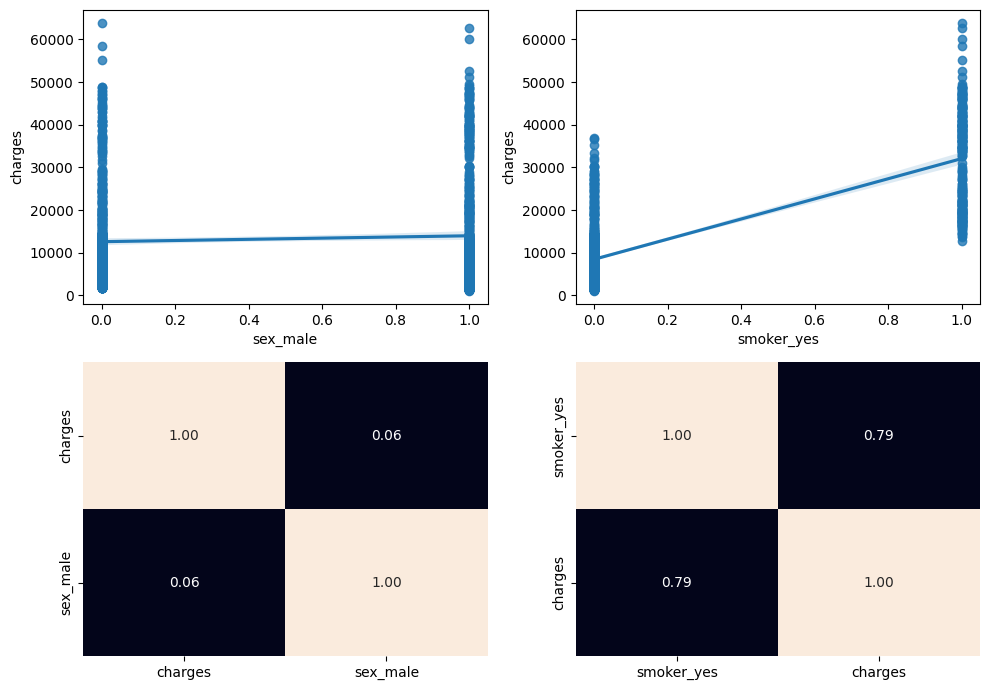

In [68]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "sex_male", y = "charges")
sns.heatmap(total_data[["charges", "sex_male"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "smoker_yes", y = "charges")
sns.heatmap(total_data[["smoker_yes", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

El que tiene mayor correlación con el tipo de cargo es si el paciente es fumador o no

In [77]:
display(total_data.groupby("sex_male")["charges"].mean().rename("cargo").to_frame())
display(total_data.groupby("smoker_yes")["charges"].mean().rename("cargo").to_frame())
display(total_data.groupby("region_northwest")["charges"].mean().rename("cargo").to_frame())
display(total_data.groupby("region_southeast")["charges"].mean().rename("cargo").to_frame())
display(total_data.groupby("region_southwest")["charges"].mean().rename("cargo").to_frame())



,cargo
sex_male,
0.0,12569.578844
1.0,13956.751178


,cargo
smoker_yes,
0.0,8434.268298
1.0,32050.231832


,cargo
region_northwest,
0.0,13544.040468
1.0,12417.575374


,cargo
region_southeast,
0.0,12722.931445
1.0,14735.411438


,cargo
region_southwest,
0.0,13566.703202
1.0,12346.937377


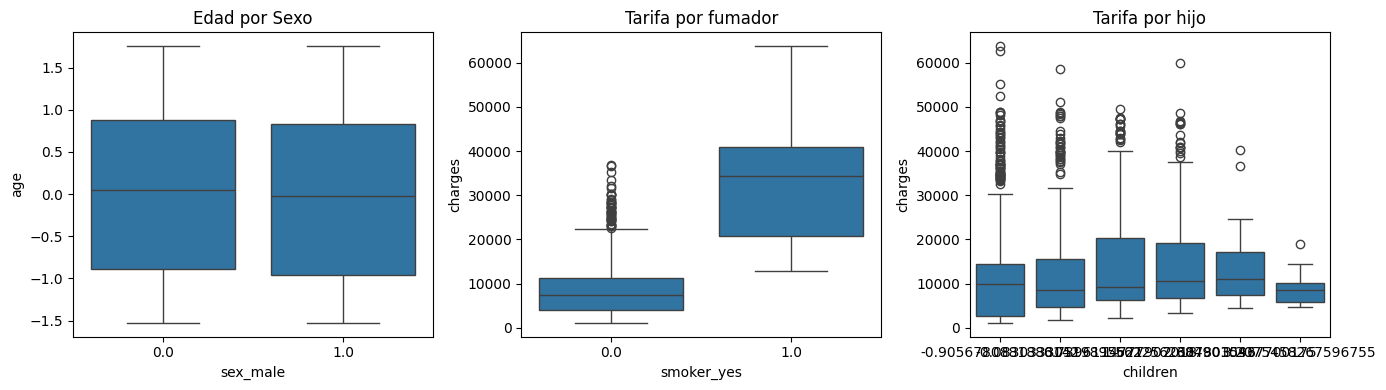

In [88]:

fig, axes = plt.subplots(1, 3, figsize=(14,4))
sns.boxplot(data=total_data, x="sex_male", y="age", ax=axes[0])
sns.boxplot(data=total_data, x="smoker_yes", y="charges", ax=axes[1])
sns.boxplot(data=total_data, x="children", y="charges", ax=axes[2])
axes[0].set_title("Edad por Sexo"); axes[1].set_title("Tarifa por fumador"); axes[2].set_title("Tarifa por hijo")
plt.tight_layout(); plt.show()

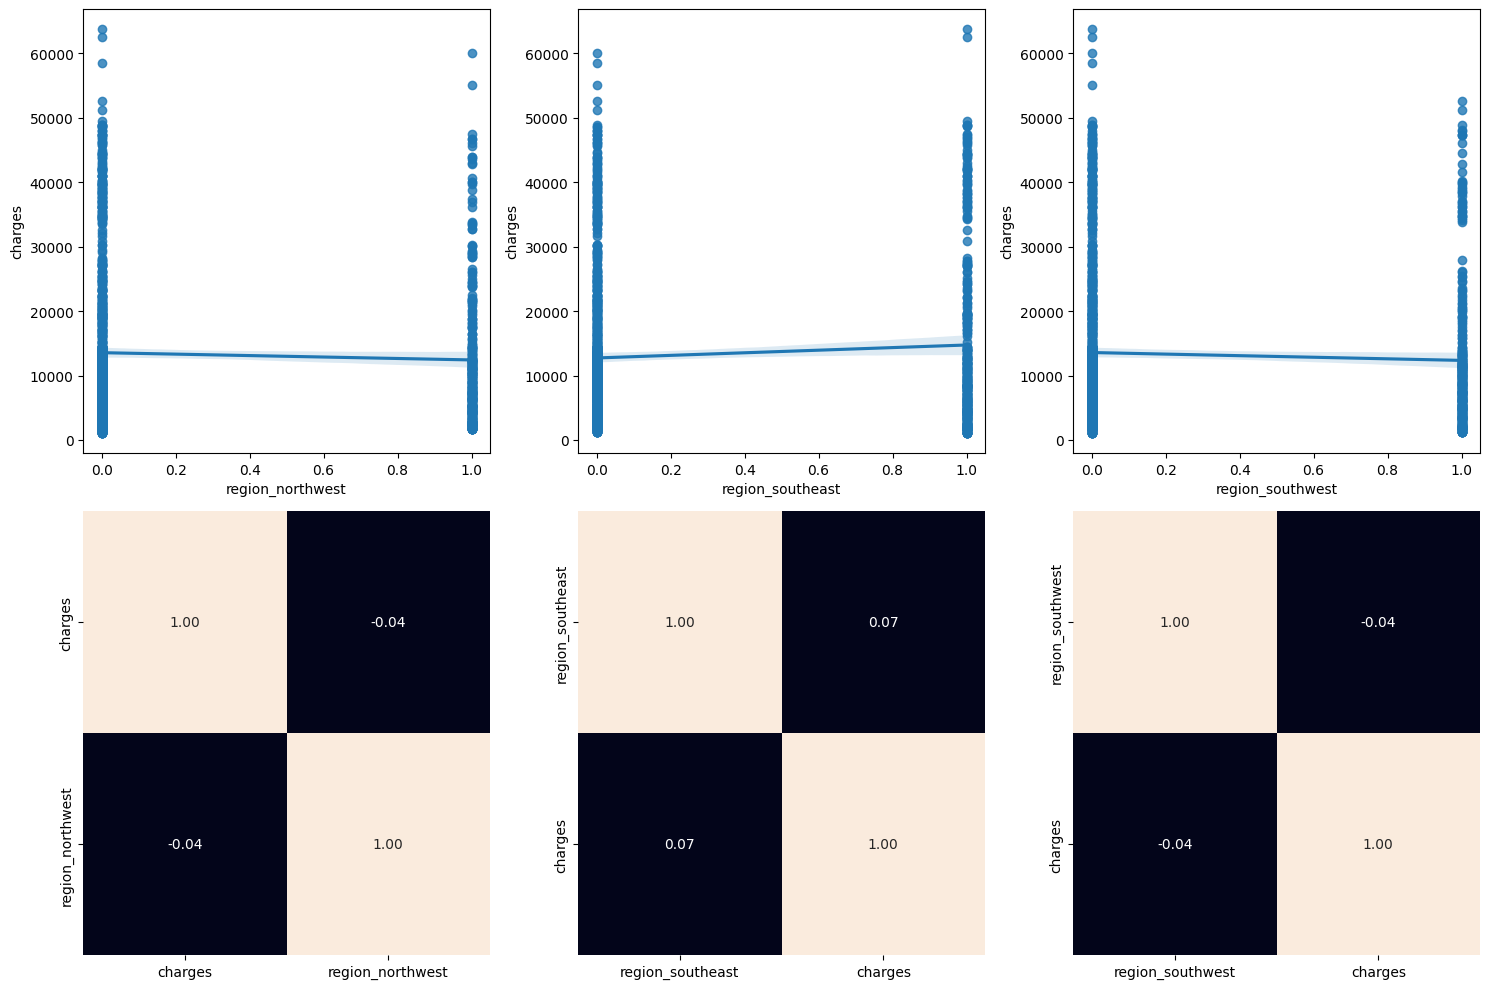

In [86]:
fig, axis = plt.subplots(2, 3,  figsize = (15, 10))

sns.regplot(ax = axis[0, 0], data = total_data, x = "region_northwest", y = "charges")
sns.heatmap(total_data[["charges", "region_northwest"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "region_southeast", y = "charges")
sns.heatmap(total_data[["region_southeast", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = total_data, x = "region_southwest", y = "charges")
sns.heatmap(total_data[["region_southwest", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()

plt.show()

In [89]:
model = LinearRegression()
model.fit(x_train_ml, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [90]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 8978.078445848969
Coeficientes (b1, b2): [ 1.74797307e+00  2.35458131e+04 -4.31444601e+02 -7.54961187e+02
 -7.02514695e+02  2.05230116e+03  3.58599203e+03  5.08907980e+02]


In [91]:
y_pred = model.predict(x_test_ml)
y_pred

array([ 6.43216250e+03,  1.10974568e+04,  8.93818052e+03,  2.85897255e+04,
        1.09527224e+04,  1.45819071e+04,  5.58967693e+03,  5.42327059e+03,
        6.09857427e+03,  1.24556204e+04,  3.72813589e+04,  2.01053936e+03,
        2.78769925e+03,  7.31093227e+03,  1.28964257e+04, -1.30660976e+01,
        5.68800692e+03,  1.08166509e+04,  8.56951427e+03,  2.52398123e+04,
        2.53193065e+03,  1.32467483e+03,  3.31660858e+04,  3.32815809e+04,
        3.48169627e+04,  2.84574290e+04,  1.71459346e+04,  6.25131560e+03,
        2.53043196e+04,  2.62719469e+04,  3.60142525e+04,  1.13611891e+04,
        1.08721663e+04,  6.44313141e+03,  7.24031674e+03,  3.33037433e+04,
        9.64524056e+03,  1.37877626e+04,  1.54197117e+04,  1.48069938e+04,
        2.84803305e+04,  2.75778207e+04,  3.48879311e+03,  7.69071075e+03,
        6.00847274e+03,  6.77794070e+03,  1.04349744e+04,  6.47019602e+03,
        3.61122027e+04,  3.87616674e+04,  1.57929719e+04,  1.30332110e+04,
        1.29442465e+04,  

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 32568669.14798409
Coeficiente de determinación: 0.7929928247448217


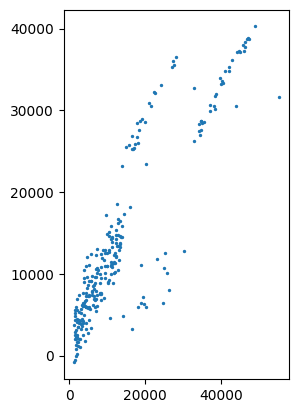

In [92]:
ax =plt.subplot(1,2,2)
ax.scatter(y_test,y_pred, s=2)